In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def replace_zeros_by_nan(array):
    new_array = np.ones((len(array)+1,len(array)+1))
    for i in range(len(array)):
        for j in range(len(array[0])):
            if array[i,j] == 0: 
                new_array[1+i,1+j] = np.nan
            else:
                new_array[1+i,1+j] = array[i,j]
    return new_array 

def mf_equ_opt(N):
    mf_equ = scipy.io.loadmat('data/mfe_cost_N{}.mat'.format(N))['mfe_cost']
    mf_opt = scipy.io.loadmat('data/mfopt_cost_N{}.mat'.format(N))['mfopt_cost']
    return replace_zeros_by_nan(mf_equ), replace_zeros_by_nan(mf_opt)

def mf_poa(N):
    mf_equ,mf_opt = mf_equ_opt(N)
    return mf_equ/mf_opt

def N_equ_opt(N):
    N_equ = scipy.io.loadmat('data/Nfinite_eq_cost_N{}.mat'.format(N))['eq_cost']
    N_opt = scipy.io.loadmat('data/Nfinite_opt_cost_N{}.mat'.format(N))['cost_opt']
    return replace_zeros_by_nan(N_equ), replace_zeros_by_nan(N_opt)

def N_poa(N):
    N_equ,N_opt = N_equ_opt(N)
    return N_equ/N_opt


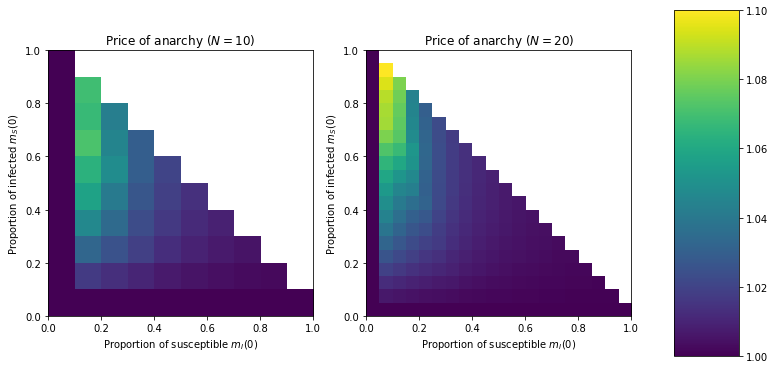

In [3]:
fig, axs = plt.subplots(1, 2)
fig.set_size_inches((12,6))

for i,N in enumerate([10,20]):
    #for i,(data,name) in enumerate([(N_poa(N),'Price of Anarchy ($N$-player game)'), (mf_poa(N),'Price-of-Anarchy (mean field)')]):
    data = N_poa(N)
    ax = plt.subplot(1,2,i+1)
    img = plt.imshow(data, origin='lower', vmin=1, vmax=1.10, extent=[0,1,0,1])
    plt.xlabel(r'Proportion of susceptible $m_I(0)$')
    plt.ylabel(r'Proportion of infected $m_S(0)$')
    plt.title(r'Price of anarchy ($N={}$)'.format(N))

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
fig.savefig('price_of_anarchy_Nfinite.pdf',bbox_inches='tight')

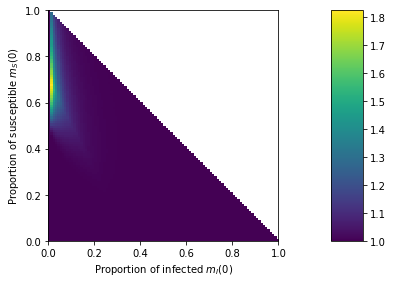

In [17]:
fig, axs = plt.subplots(1, 1)
N=100
data=mf_poa(N)
#print(data)
ax = plt.subplot(1,1,1)
for i in range(50):
    for j in range(50):
        if np.isnan(data[i,j]): 
            data[i,j] = 0
#img = plt.imshow(data2, origin='lower', vmin=1, extent=[0,1,0,1], interpolation='bilinear')
img = plt.imshow(data, origin='lower', vmin=1, extent=[0,1,0,1])
plt.xlabel(r'Proportion of infected $m_I(0)$')
plt.ylabel(r'Proportion of susceptible $m_S(0)$')
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

fig.savefig('price_of_anarchy_infinite.pdf',bbox_inches='tight')

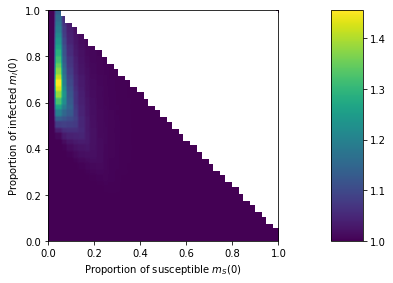

In [5]:
import scipy.interpolate
fig, axs = plt.subplots(1, 1)
N=40
data=mf_poa(N)
data2 = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        data2[i,j] = data[int(i*39/100),int(j*39/100)]
        if abs(i+j-200) <= 3: data2[i,j] = 1

ax = plt.subplot(1,1,1)
img = plt.imshow(data2, origin='lower', vmin=1, extent=[0,1,0,1], interpolation='bilinear')
plt.xlabel(r'Proportion of susceptible $m_S(0)$')
plt.ylabel(r'Proportion of infected $m_I(0)$')
plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)

fig.savefig('price_of_anarchy_infinite.pdf',bbox_inches='tight')

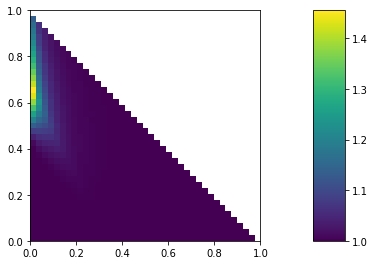

## Misc

[1.00631313 1.01283663 1.01946915 1.02608723 1.0325506  1.03871026
 1.0444171  1.04953994 1.05423261 1.05927093 1.06554473 1.07251876
 1.08033337 1.08616532 1.08695511 1.08919535 1.09491526 1.10206757
        nan]
[1.         1.         1.         1.         1.         1.
 1.         1.01514976 1.05785916 1.11945355 1.18859072 1.24032066
 1.20149454 1.1676574  1.13789622 1.11209022 1.0900206  1.0714041
        nan]
[1.0170068  1.03285852 1.04671867 1.05769525 1.06439345 1.07155653
 1.06728045 1.06930089        nan]
[1.         1.         1.00123397 1.03250846 1.08839118 1.06705896
 1.04702605 1.03074136        nan]


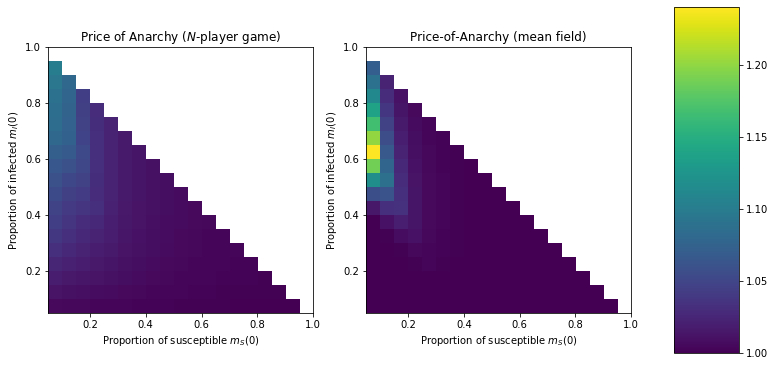

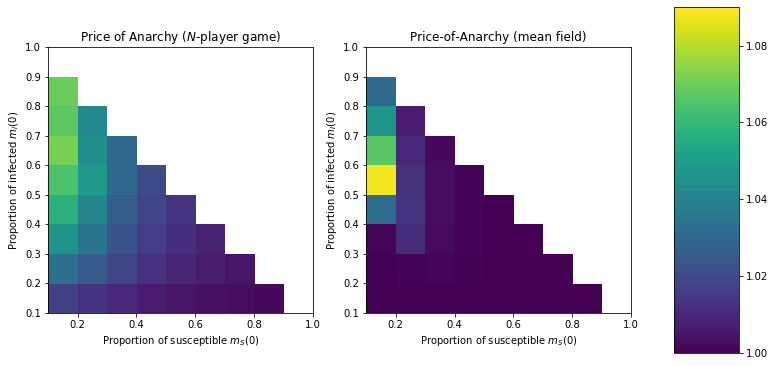

In [72]:

for N in [20,10]:
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches((12,6))
    for i,(data,name) in enumerate([(N_poa(N),'Price of Anarchy ($N$-player game)'), (mf_poa(N),'Price-of-Anarchy (mean field)')]):
        ax = plt.subplot(1,2,i+1)
        print(data[:,0])
        #ax.label_outer()
        img = plt.imshow(data, origin='lower', vmin=1, vmax=(1.24 if N==20 else 1.09), extent=[1/N,1,1/N,1])
        plt.xlabel(r'Proportion of susceptible $m_S(0)$')
        plt.ylabel(r'Proportion of infected $m_I(0)$')
        plt.title(name)

    #fig.colorbar(img, ax=axs, orientation='horizontal', fraction=.1)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(cax=cax)
